In [52]:
import pandas as pd
# Load the dataset
df = pd.read_csv('1900_2021_DISASTERS_INTERPOLATED.csv')
df2 =df

In [53]:
## Values taken as input are scaled using one hot encoding
## Numerical Values Taken as input are converted using min max scaler 

# Assuming your data is stored in a Pandas dataframe called "df"

# Select the features that you want to scale
features = df[['Dis Mag Value', 'Latitude', 'Longitude', 'Total Deaths',
       'No Injured', 'No Affected', 'No Homeless', 'Total Affected', 'CPI', 'Rank']]

# Iterate through each feature
for feature in features:
  # Select the feature
  col = df[feature]

  # Find the minimum and maximum values for the column
  min_value = col.min()
  max_value = col.max()

  # Subtract the minimum value from the column
  scaled_col = col - min_value

  # Divide by the range (max - min)
  scaled_col = scaled_col / (max_value - min_value)

  # Assign the scaled values to a new column in the dataframe
  df[f'scaled_{feature}'] = scaled_col
df.head

<bound method NDFrame.head of        Unnamed: 0 Disaster Subgroup Disaster Type  Disaster Subtype  \
0               0    climatological       drought           drought   
1               1    climatological       drought           drought   
2               2       geophysical    earthquake   ground movement   
3               7    meteorological         storm  tropical cyclone   
4               9       geophysical    earthquake   ground movement   
...           ...               ...           ...               ...   
14931       16121      hydrological         flood               NaN   
14932       16122      hydrological         flood               NaN   
14933       16123        biological      epidemic     viral disease   
14934       16124      hydrological         flood               NaN   
14935       16125      hydrological         flood               NaN   

      Disaster Subsubtype  Event Name                                 Country  \
0                     NaN         Na

In [54]:
df = pd.get_dummies(df, columns=['Disaster Subgroup','Country', 'Disaster Type', 'ISO', 'Region', 'Continent','Dis Mag Scale','Timezone'])
df.columns

Index(['Unnamed: 0', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name',
       'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'OFDA Response', 'Appeal',
       ...
       'Timezone_Pacific/Niue', 'Timezone_Pacific/Noumea',
       'Timezone_Pacific/Pago_Pago', 'Timezone_Pacific/Palau',
       'Timezone_Pacific/Port_Moresby', 'Timezone_Pacific/Saipan',
       'Timezone_Pacific/Tahiti', 'Timezone_Pacific/Tarawa',
       'Timezone_Pacific/Tongatapu', 'Timezone_Pacific/Wallis'],
      dtype='object', length=738)

In [55]:
df = df.dropna(axis=1)
df.columns

Index(['Unnamed: 0', 'Aid Contribution', 'Dis Mag Value', 'Latitude',
       'Longitude', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected',
       ...
       'Timezone_Pacific/Niue', 'Timezone_Pacific/Noumea',
       'Timezone_Pacific/Pago_Pago', 'Timezone_Pacific/Palau',
       'Timezone_Pacific/Port_Moresby', 'Timezone_Pacific/Saipan',
       'Timezone_Pacific/Tahiti', 'Timezone_Pacific/Tarawa',
       'Timezone_Pacific/Tongatapu', 'Timezone_Pacific/Wallis'],
      dtype='object', length=727)

In [56]:
# import necessary libraries
import numpy as np
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# select the features and target columns
X = df.drop(['Total Deaths','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  
#y = df3['Rank']
y = df[['Rank', 'scaled_Dis Mag Value']]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='linear'))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test, return_dict=True)
#print(f'Test loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}')
#print('Test loss: {:.4f}, Test MAE: {:.4f}'.format(test_loss, test_mae))
print(test_loss)
print(test_mae)


# use the model to make predictions on new data
#new_data = np.array([[...]]) # replace with actual data
#predictions = model.predict(new_data)

Epoch 1/50
374/374 [==============================] - 1s 893us/step - loss: 26756526.0000 - mae: 3055.2742
Epoch 2/50
374/374 [==============================] - 0s 909us/step - loss: 2991205.2500 - mae: 811.9517
Epoch 3/50
374/374 [==============================] - 0s 898us/step - loss: 1342448.8750 - mae: 505.2916
Epoch 4/50
374/374 [==============================] - 0s 939us/step - loss: 1014510.1875 - mae: 449.3370
Epoch 5/50
374/374 [==============================] - 0s 911us/step - loss: 812937.0625 - mae: 398.5540
Epoch 6/50
374/374 [==============================] - 0s 931us/step - loss: 659911.0000 - mae: 346.1614
Epoch 7/50
374/374 [==============================] - 0s 949us/step - loss: 546261.0000 - mae: 303.8280
Epoch 8/50
374/374 [==============================] - 0s 1ms/step - loss: 461624.2500 - mae: 269.7254
Epoch 9/50
374/374 [==============================] - 0s 1ms/step - loss: 395346.5000 - mae: 241.1055
Epoch 10/50
374/374 [==============================] - 0s 889u

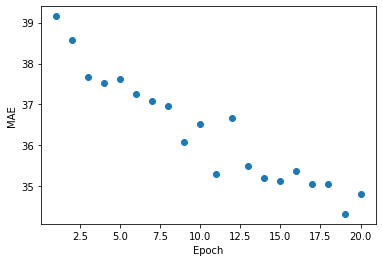

In [57]:
import matplotlib.pyplot as plt

# train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# extract the MAE values from the history
mae = history.history['mae']

# plot the MAE values
#plt.plot(mae)
#plt.xlabel('Epoch')
#plt.ylabel('MAE')
#plt.show()

# create a scatter plot with the epoch numbers on the x-axis and the MAE values on the y-axis
plt.scatter(range(1, len(mae) + 1), mae)
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

In [58]:
##Not working Rn  
#Need to scale the target values for this to work 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the data and split it into training and testing sets
X = df.drop(['Total Deaths','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  
#y = df3['Rank']
y = df['Rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform')
knn.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = knn.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.04484605087014726


In [59]:
##Should work with scaled values 
from sklearn.linear_model import LinearRegression

##### Using label encoding
#X = merged.drop(columns =['Disaster Subgroup', 'Disaster Type','Country','ISO','Region','Continent'])
#y = dfle['Disaster Subgroup']
#X = dfle[['ISO', 'Region','Continent','Disaster Type']]

#X = dfle[['ISO', 'Disaster Subgroup','Continent','Timezone','Disaster Type','Latitude','Longitude','Region','Start Date','End Date']]
#y = dfle['Country']

#X = dfle[['ISO','Country','Disaster Subgroup','Continent','Disaster Type','Latitude','Longitude','Region','Timezone','Dis Mag Value','Dis Mag Scale','Aid Contribution','No Injured','No Affected','No Homeless','Total Affected','CPI']]
#y = dfle['Total Deaths']

X = df.drop(['Total Deaths','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  
#y = df3['Rank']
y = df[ 'scaled_Dis Mag Value']

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 9.79272462393702e-18


In [60]:
# Import the necessary libraries
#import tensorflow as tf
#import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#from sklearn.preprocessing import LabelEncoder

# Load the data
#X =dfle[['ISO', 'Region','Continent','Disaster Type']]
#y =  dfle['Disaster Subgroup']
#X = dfle[['ISO', 'Disaster Subgroup','Continent','Country','Disaster Type','Latitude','Longitude','Region','Start Date','End Date']]
#y = dfle['Timezone']

X = df.drop(['Total Deaths','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  
#y = df3['Rank']
y = df[['Rank', 'scaled_Dis Mag Value']]


# Encode the string feature as a numerical value
# Trying to convert string to a numerical Value for the nueral network to process
#encoder = LabelEncoder()
#X = encoder.fit_transform(X)
#y = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_logarithmic_error'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.2f}")

Epoch 1/40
299/299 [==============================] - 1s 2ms/step - loss: 37177476.0000 - accuracy: 0.0254 - val_loss: 37497908.0000 - val_accuracy: 0.0285
Epoch 2/40
299/299 [==============================] - 0s 1ms/step - loss: 37177504.0000 - accuracy: 0.0254 - val_loss: 37497908.0000 - val_accuracy: 0.0285
Epoch 3/40
299/299 [==============================] - 0s 1ms/step - loss: 37177492.0000 - accuracy: 0.0254 - val_loss: 37497908.0000 - val_accuracy: 0.0285
Epoch 4/40
299/299 [==============================] - 0s 1ms/step - loss: 37177476.0000 - accuracy: 0.0254 - val_loss: 37497908.0000 - val_accuracy: 0.0285
Epoch 5/40
299/299 [==============================] - 0s 1ms/step - loss: 37177468.0000 - accuracy: 0.0254 - val_loss: 37497908.0000 - val_accuracy: 0.0285
Epoch 6/40
299/299 [==============================] - 0s 1ms/step - loss: 37177480.0000 - accuracy: 0.0254 - val_loss: 37497908.0000 - val_accuracy: 0.0285
Epoch 7/40
299/299 [==============================] - 0s 1ms/ste

In [61]:
# Import the necessary libraries
#import tensorflow as tf
#import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#from sklearn.preprocessing import LabelEncoder

# Load the data
#X =dfle[['ISO', 'Region','Continent','Disaster Type']]
#y =  dfle['Disaster Subgroup']
#X = dfle[['ISO', 'Disaster Subgroup','Continent','Country','Disaster Type','Latitude','Longitude','Region','Start Date','End Date']]
#y = dfle['Timezone']


#X = df.drop([['Aid Contribution', 'Dis Mag Value', 'Latitude',
 #      'Longitude', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
  #'Total Affected']])
X = df.drop(['Total Deaths','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  

y = df['Total Deaths']


# Encode the string feature as a numerical value
# Trying to convert string to a numerical Value for the nueral network to process
#encoder = LabelEncoder()
#X = encoder.fit_transform(X)
#y = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.2f}")

Epoch 1/20


C:\Users\umerf\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


299/299 [==============================] - 1s 2ms/step - loss: -12753143028776960.0000 - accuracy: 0.0000e+00 - val_loss: -73166752162250752.0000 - val_accuracy: 0.0000e+00
Epoch 2/20
299/299 [==============================] - 0s 1ms/step - loss: -553553664489291776.0000 - accuracy: 0.0000e+00 - val_loss: -1506407620989157376.0000 - val_accuracy: 0.0000e+00
Epoch 3/20
299/299 [==============================] - 0s 1ms/step - loss: -3978883541537652736.0000 - accuracy: 0.0000e+00 - val_loss: -7697781511373717504.0000 - val_accuracy: 0.0000e+00
Epoch 4/20
299/299 [==============================] - 0s 1ms/step - loss: -14300722120366227456.0000 - accuracy: 0.0000e+00 - val_loss: -23236836848859873280.0000 - val_accuracy: 0.0000e+00
Epoch 5/20
299/299 [==============================] - 0s 1ms/step - loss: -36424902679940038656.0000 - accuracy: 0.0000e+00 - val_loss: -53283485770210869248.0000 - val_accuracy: 0.0000e+00
Epoch 6/20
299/299 [==============================] - 0s 1ms/step - loss

In [63]:
df2.columns

Index(['Unnamed: 0', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'Disaster Subsubtype', 'Event Name', 'Country', 'ISO', 'Region',
       'Continent', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution',
       'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Timezone',
       'River Basin', 'Total Deaths', 'No Injured', 'No Affected',
       'No Homeless', 'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)', 'CPI', 'Start Date', 'End Date', 'Rank',
       'scaled_Dis Mag Value', 'scaled_Latitude', 'scaled_Longitude',
       'scaled_Total Deaths', 'scaled_No Injured', 'scaled_No Affected',
       'scaled_No Homeless', 'scaled_Total Affected', 'scaled_CPI',
       'scaled_Rank'],
      dtype='object')

In [65]:
df2 = pd.get_dummies(df2, columns=['Disaster Subgroup', 'Disaster Type', 'ISO', 'Region', 'Continent','Dis Mag Scale','Timezone'])
df2.columns

Index(['Unnamed: 0', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name',
       'Country', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'OFDA Response',
       ...
       'Timezone_Pacific/Niue', 'Timezone_Pacific/Noumea',
       'Timezone_Pacific/Pago_Pago', 'Timezone_Pacific/Palau',
       'Timezone_Pacific/Port_Moresby', 'Timezone_Pacific/Saipan',
       'Timezone_Pacific/Tahiti', 'Timezone_Pacific/Tarawa',
       'Timezone_Pacific/Tongatapu', 'Timezone_Pacific/Wallis'],
      dtype='object', length=511)

In [66]:
df2 = df2.dropna(axis=1)

In [69]:
## Experimental This is not working 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assume you have a dataframe 'df' with columns 'feature1', 'feature2', ..., 'target'
# and a list of the column names of the features called 'feature_cols'

# Split the data into features and target
#X = df[['ISO', 'Disaster Subgroup','Continent','Disaster Type','Latitude','Longitude','Region','Start Date','End Date']]

X = df2.drop(['Country','Total Deaths','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  

y = df2['Country']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Use the 'predict' method to make predictions on the test data
predictions = logreg.predict(X_test)

# You can also use the 'predict_proba' method to predict the class probabilities
probabilities = logreg.predict_proba(X_test)

# Evaluate the model's performance on the test data using the 'accuracy_score' function from the 'sklearn.metrics' module
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Test accuracy: {accuracy:.2f}")

Test accuracy: 0.06


C:\Users\umerf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
##Encoding using one hot encoding
df = pd.get_dummies(df, columns=['Disaster Subgroup', 'Disaster Type', 'Country', 'ISO', 'Region', 'Continent','Dis Mag Scale','Timezone'])


In [ ]:
## Scaling using Min Max 
# Assuming your data is stored in a Pandas dataframe called "df"

# Select the features that you want to scale
features = df[['Dis Mag Value', 'Latitude', 'Longitude', 'Total Deaths',
       'No Injured', 'No Affected', 'No Homeless', 'Total Affected', 'CPI', 'Rank']]

# Iterate through each feature
for feature in features:
  # Select the feature
  col = df[feature]

  # Find the minimum and maximum values for the column
  min_value = col.min()
  max_value = col.max()

  # Subtract the minimum value from the column
  scaled_col = col - min_value

  # Divide by the range (max - min)
  scaled_col = scaled_col / (max_value - min_value)

  # Assign the scaled values to a new column in the dataframe
  df[f'scaled_{feature}'] = scaled_col
df.head

In [ ]:
# import necessary libraries
import numpy as np
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# select the features and target columns
X = df.drop(['Total Deaths','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  
#y = df3['Rank']
y = df[['Rank', 'scaled_Dis Mag Value']]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='linear'))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test, return_dict=True)
#print(f'Test loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}')
#print('Test loss: {:.4f}, Test MAE: {:.4f}'.format(test_loss, test_mae))
print(test_loss)
print(test_mae)


# use the model to make predictions on new data
#new_data = np.array([[...]]) # replace with actual data
#predictions = model.predict(new_data)

In [ ]:
##Need to preprocess the data first

# create a Pandas data frame with the input data for the new samples
lol = df = pd.read_csv('2022_DISASTERS_TARGET.csv')


# convert the data frame to a NumPy array
new_data = lol.values

# use the model to make predictions on the new data
predictions = model.predict(new_data)

In [ ]:
import matplotlib.pyplot as plt

# train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)

# extract the MAE values from the history
mae = history.history['mae']

# plot the MAE values
plt.plot(mae)
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

# create a scatter plot with the epoch numbers on the x-axis and the MAE values on the y-axis
#plt.scatter(range(1, len(mae) + 1), mae)
#plt.xlabel('Epoch')
#plt.ylabel('MAE')
#plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

##### Using label encoding
#X = merged.drop(columns =['Disaster Subgroup', 'Disaster Type','Country','ISO','Region','Continent'])
#y = dfle['Disaster Subgroup']
#X = dfle[['ISO', 'Region','Continent','Disaster Type']]

#X = dfle[['ISO', 'Disaster Subgroup','Continent','Timezone','Disaster Type','Latitude','Longitude','Region','Start Date','End Date']]
#y = dfle['Country']

#X = dfle[['ISO','Country','Disaster Subgroup','Continent','Disaster Type','Latitude','Longitude','Region','Timezone','Dis Mag Value','Dis Mag Scale','Aid Contribution','No Injured','No Affected','No Homeless','Total Affected','CPI']]
#y = dfle['Total Deaths']

X = df.drop(['Total Deaths','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  
#y = df3['Rank']
y = df[ 'scaled_Dis Mag Value']

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
# Import the necessary libraries
#import tensorflow as tf
#import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#from sklearn.preprocessing import LabelEncoder

# Load the data
#X =dfle[['ISO', 'Region','Continent','Disaster Type']]
#y =  dfle['Disaster Subgroup']
#X = dfle[['ISO', 'Disaster Subgroup','Continent','Country','Disaster Type','Latitude','Longitude','Region','Start Date','End Date']]
#y = dfle['Timezone']

X = df.drop(['Total Deaths','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  
#y = df3['Rank']
y = df[['Rank', 'scaled_Dis Mag Value']]


# Encode the string feature as a numerical value
# Trying to convert string to a numerical Value for the nueral network to process
#encoder = LabelEncoder()
#X = encoder.fit_transform(X)
#y = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_logarithmic_error'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.2f}")

In [ ]:

from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns
cat_cols = df[['Disaster Subgroup', 'Disaster Type', 'Country', 'ISO', 'Region', 'Continent','Dis Mag Scale']]

# Create the OneHotEncoder object
onehot_encoder = OneHotEncoder(sparse=False)

# One-hot encode the categorical columns
onehot_encoded = onehot_encoder.fit_transform(df[cat_cols])

# Add the one-hot encoded columns to the original dataframe
df_onehot = pd.concat([df, pd.DataFrame(onehot_encoded)], axis=1)

# Drop the categorical columns
df_onehot = df_onehot.drop(cat_cols, axis=1)


# Display the resulting dataframe
df2.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical columns
num_cols = ['Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Total Deaths',
            'No Injured', 'No Affected', 'No Homeless', 'Total Affected', 'Insured Damages ('000 US$)', 
            'Total Damages ('000 US$)', 'CPI']

# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Scale the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
#Creating a Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
df['Disaster Type']= le.fit_transform(df['Disaster Type'])
df['Disaster Type']

In [ ]:
#Changing categorical values to numerical values
dfle = df
dfle.Continent = le.fit_transform(dfle.Continent)
dfle.ISO= le.fit_transform(dfle.ISO)
dfle.Region= le.fit_transform(dfle.Region)
dfle['Disaster Type']= le.fit_transform(dfle['Disaster Type'])
dfle['Disaster Subgroup']= le.fit_transform(dfle['Disaster Subgroup'])
dfle['Start Date']= le.fit_transform(dfle['Start Date'])
dfle['End Date']= le.fit_transform(dfle['End Date'])
dfle['Timezone']= le.fit_transform(dfle['Timezone'])
dfle['Country']= le.fit_transform(dfle['Country'])
dfle['Dis Mag Scale']= le.fit_transform(dfle['Dis Mag Scale'])
dfle.head()
dfle.columns

In [ ]:
# # Convert the 'Date' column to a datetime type
# df3['Start Date'] = pd.to_datetime(df3['Start Date'])

# # Extract the month from each date
# df3['Year'] = df3['Start Date'].dt.year

# F = df3[['Year','Longitude','Latitude']]
# #F 

In [ ]:
# # Convert the 'Date' column to a datetime type
# df3['Start Date'] = pd.to_datetime(df3['Start Date'])

# # Extract the month from each date
# df3['Year'] = df3['Start Date'].dt.year

# F = df3[['Year','Longitude','Latitude']]
# #F
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Load the dataset and extract the input features and target variable
# #X = dfle[['ISO','Total Deaths','Disaster Subgroup','Continent','Disaster Type','Latitude','Longitude','Region','Timezone','Dis Mag Value','Dis Mag Scale','Aid Contribution','No Injured','No Affected','No Homeless','Total Affected','CPI']]
# #y = dfle['Country']

# X = df3.drop(['Total Deaths','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  
# #y = df3['Rank']
# y = F




# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Train a random forest classifier on the training set
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model's performance using accuracy
# acc = accuracy_score(y_test, y_pred)
# print("Accuracy: {:.2f}".format(acc))

In [ ]:
from sklearn.linear_model import LinearRegression

##### Using label encoding
#X = merged.drop(columns =['Disaster Subgroup', 'Disaster Type','Country','ISO','Region','Continent'])
#y = dfle['Disaster Subgroup']
#X = dfle[['ISO', 'Region','Continent','Disaster Type']]

#X = dfle[['ISO', 'Disaster Subgroup','Continent','Timezone','Disaster Type','Latitude','Longitude','Region','Start Date','End Date']]
#y = dfle['Country']

X = dfle[['ISO','Country','Disaster Subgroup','Continent','Disaster Type','Latitude','Longitude','Region','Timezone','Dis Mag Value','Dis Mag Scale','Aid Contribution','No Injured','No Affected','No Homeless','Total Affected','CPI']]
y = dfle['Total Deaths']

#X = df3.drop(['Total Deaths'], axis=1)  
#y = df3['Total Deaths']

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


In [ ]:
# Import the necessary libraries
#import tensorflow as tf
#import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#from sklearn.preprocessing import LabelEncoder

# Load the data
#X =dfle[['ISO', 'Region','Continent','Disaster Type']]
#y =  dfle['Disaster Subgroup']
#X = dfle[['ISO', 'Disaster Subgroup','Continent','Country','Disaster Type','Latitude','Longitude','Region','Start Date','End Date']]
#y = dfle['Timezone']

X = dfle[['ISO','Country','Disaster Subgroup','Continent','Disaster Type','Latitude','Longitude','Region','Timezone','Dis Mag Value','Dis Mag Scale','Aid Contribution','No Injured','No Affected','No Homeless','Total Affected','CPI']]
y = dfle['Total Deaths']


# Encode the string feature as a numerical value
# Trying to convert string to a numerical Value for the nueral network to process
#encoder = LabelEncoder()
#X = encoder.fit_transform(X)
#y = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.2f}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assume you have a dataframe 'df' with columns 'feature1', 'feature2', ..., 'target'
# and a list of the column names of the features called 'feature_cols'

# Split the data into features and target
X = dfle[['ISO', 'Disaster Subgroup','Continent','Disaster Type','Latitude','Longitude','Region','Start Date','End Date']]
y = dfle['Timezone']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Use the 'predict' method to make predictions on the test data
predictions = logreg.predict(X_test)

# You can also use the 'predict_proba' method to predict the class probabilities
probabilities = logreg.predict_proba(X_test)

# Evaluate the model's performance on the test data using the 'accuracy_score' function from the 'sklearn.metrics' module
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)